# Figure 11: Encoding throughput heatmap

## Load session data

In [1]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

Got floating_ip: 129.114.108.4


## Experiment

Measure SLEC encoding throughput for differnet k and p

In [2]:
with ssh.Remote(floating_ip) as conn:
    conn.run("cd /home/cc/ReedSolomonEC && "
             "tmux new-session -d -s fig11-session 'python scripts/gen_slec.py; tmux kill-session -t fig11-session'")
    print("Experiments are now running in the background using tmux.")
    print("This can take roughly 2-3 hours. You don't need to keep your laptop on during this process."
              "However, we suggest you don't close this webpage, so that you can connect to this workspace later.")

/opt/conda/lib/python3.10/site-packages/paramiko/client.py:835: UserWarning: Unknown ssh-ed25519 host key for 129.114.108.4: b'4099ef149fcbde3b33ee1eb4701fad8c'
  warnings.warn(


Experiments are now running in the background using tmux.
This can take roughly 2-3 hours. You don't need to keep your laptop on during this process.However, we suggest you don't close this webpage, so that you can connect to this workspace later.


## Wait for results

Experiments are now running in the background using tmux.

You can use the code below to check if the experiments have finished or not:

In [27]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

print("Checking the status of the experiments....")

with ssh.Remote(floating_ip) as conn:
    curr = int(time.time())
    log_temp_path = "/tmp/tmux_sessions_{}.log".format(curr)
    conn.run("tmux list-sessions &> {}".format(log_temp_path), warn=True)
    conn.get(log_temp_path, log_temp_path)
    with open(log_temp_path, "r") as file:
        tmux_sessions = file.read()
    if "fig11-session" in tmux_sessions:
        print("Experiments are still running... Please wait....")
    else:
        print("Experiments have finished! You can now fetch results and make plots")

Got floating_ip: 129.114.108.4
Checking the status of the experiments....
Experiments are still running... Please wait....


## Fetch results

After the experiments are finished, you can retrive results from remote server to this container

In [28]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]

with ssh.Remote(floating_ip) as conn:
    conn.get("/home/cc/ReedSolomonEC/data/test.csv", "data/fig11/slec.dat")

## Plotting

We now plot Figure 11 based on experiment results

In [22]:
# We first install seaborn so that we can plot the heatmap
!pip3 install seaborn

Figure(1600x600)


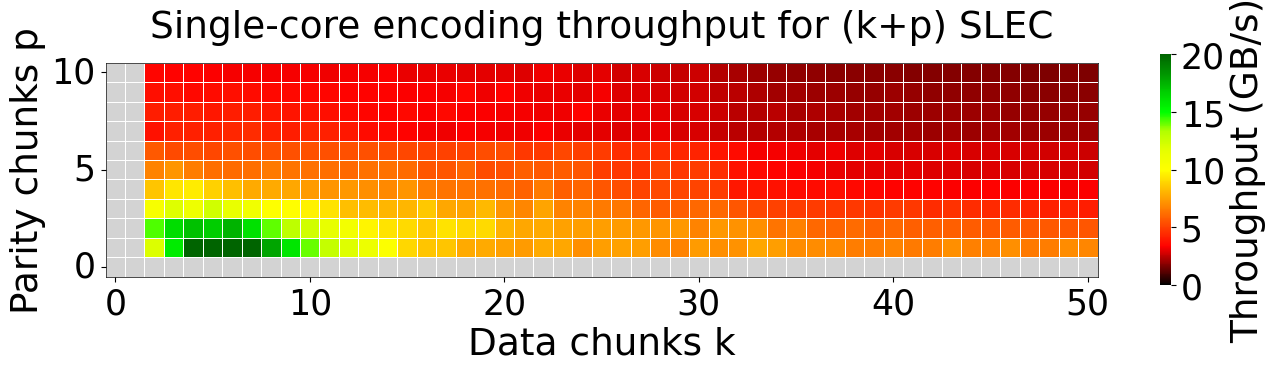

In [1]:
!mkdir -p plots/fig11
!python3 scripts/fig11/plot.py data/fig11/slec.dat plots/fig11/slec-thru-heatmap.png

from IPython.display import Image
Image(filename='plots/fig11/slec-thru-heatmap.png', width=700)

The figure above should have the same pattern as Figure 11 in the paper. The absolute values could be different, because we used a different machine for throughput evaluation  when we wrote the paper. However, the relative values and our findings stay the same.